In [1]:
import pandas as pd
import seaborn as sns

#Import features and target files
features = pd.read_csv('pump_features.csv')
target = pd.read_csv('pump_target.csv')

#Merge features and target into single dataframe
df = features.merge(target, left_on='id', right_on='id')

In [2]:
df_train = pd.read_csv('train_data.csv')
df_test = pd.read_csv('test_data.csv')

In [3]:
df_train.head()

,Unnamed: 0,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


# Removing Features

## Exploring columns that look similar

In [4]:
unique_df = df_train['quality_group'].value_counts()
print(unique_df)

print(' ')

unique_df = df_train['water_quality'].value_counts()
print(unique_df)

good        40640
salty        4168
unknown      1493
milky         648
colored       393
fluoride      178
Name: quality_group, dtype: int64
 
soft                  40640
salty                  3884
unknown                1493
milky                   648
coloured                393
salty abandoned         284
fluoride                162
fluoride abandoned       16
Name: water_quality, dtype: int64


In [5]:
unique_df = df_train['extraction_type'].value_counts()
print(unique_df)

print(' ')

unique_df = df_train['extraction_type_group'].value_counts()
print(unique_df)

print(' ')

unique_df = df_train['extraction_type_class'].value_counts()
print(unique_df)

gravity                      21415
nira/tanira                   6578
other                         5106
submersible                   3834
swn 80                        2959
mono                          2306
india mark ii                 1910
afridev                       1391
ksb                           1107
other - rope pump              363
other - swn 81                 179
windmill                        89
india mark iii                  78
cemo                            74
other - play pump               73
walimi                          35
climax                          22
other - mkulima/shinyanga        1
Name: extraction_type, dtype: int64
 
gravity            21415
nira/tanira         6578
other               5106
submersible         4941
swn 80              2959
mono                2306
india mark ii       1910
afridev             1391
rope pump            363
other handpump       288
other motorpump       96
wind-powered          89
india mark iii        78
Name: e

In [6]:
unique_df = df_train['management'].value_counts()
print(unique_df)

print(' ')

unique_df = df_train['management_group'].value_counts()
print(unique_df)

vwc                 32395
wug                  5212
water board          2344
wua                  2018
private operator     1581
parastatal           1420
water authority       730
other                 672
company               564
unknown               448
other - school         73
trust                  63
Name: management, dtype: int64
 
user-group    41969
commercial     2938
parastatal     1420
other           745
unknown         448
Name: management_group, dtype: int64


In [7]:
unique_df = df_train['payment'].value_counts()
print(unique_df)

print(' ')

unique_df = df_train['payment_type'].value_counts()
print(unique_df)

never pay                20264
pay per bucket            7205
pay monthly               6637
unknown                   6505
pay when scheme fails     3155
pay annually              2927
other                      827
Name: payment, dtype: int64
 
never pay     20264
per bucket     7205
monthly        6637
unknown        6505
on failure     3155
annually       2927
other           827
Name: payment_type, dtype: int64


In [8]:
unique_df = df_train['source'].value_counts()
print(unique_df)

print(' ')

unique_df = df_train['source_type'].value_counts()
print(unique_df)

print(' ')

unique_df = df_train['source_class'].value_counts()
print(unique_df)

spring                  13616
shallow well            13437
machine dbh              8886
river                    7686
rainwater harvesting     1828
hand dtw                  723
lake                      613
dam                       518
other                     167
unknown                    46
Name: source, dtype: int64
 
spring                  13616
shallow well            13437
borehole                 9609
river/lake               8299
rainwater harvesting     1828
dam                       518
other                     213
Name: source_type, dtype: int64
 
groundwater    36662
surface        10645
unknown          213
Name: source_class, dtype: int64


In [9]:
unique_df = df_train['waterpoint_type'].value_counts()
print(unique_df)

print(' ')

unique_df = df_train['waterpoint_type_group'].value_counts()
print(unique_df)

communal standpipe             22782
hand pump                      14029
other                           5066
communal standpipe multiple     4913
improved spring                  629
cattle trough                     95
dam                                6
Name: waterpoint_type, dtype: int64
 
communal standpipe    27695
hand pump             14029
other                  5066
improved spring         629
cattle trough            95
dam                       6
Name: waterpoint_type_group, dtype: int64


## Remove columns that are nearly identical to each other
* **quantity_group** and **quanitity**: Exactly the same, so I randomly chose quantity.
* **quality_group** and **water_quality**: Water_quality has more variables with fewer value counts per variable, which might lead to overfitting, so I chose quality_group.
* **extraction_type, extraction_type_group, extraction_type_class**: To avoid overfitting, I'll use extraction_type_class, which has the fewest and most generalized variables.
* **management** and **management_group**: The variable names in management are difficult to interpret, so I chose management_group.
* **payment** and **payment_type**: They have the same counts and number of variables, but payment_type is more interpretable, so I chose payment_type.
* **source, source_type,** and **source_class**: I chose source_type because it combines other/unknown, and it combines river/lake, but it doesn't shrink down to only three variables as source_class does, which I believe is not specific enough.
* **waterpoint_type** and **waterpoint_type_group**: I don't think there's a large difference between communal standpipe and communal standpipe multiple. Since waterpoint_type separates these variables, I chose waterpoint_type_group.

In [4]:
df_train.drop(columns = 'quantity_group', inplace = True)
df_train.drop(columns = 'water_quality', inplace=True)
df_train.drop(columns = 'extraction_type', inplace=True)
df_train.drop(columns = 'extraction_type_group', inplace=True)
df_train.drop(columns = 'management', inplace=True)
df_train.drop(columns = 'payment', inplace=True)
df_train.drop(columns = 'source', inplace=True)
df_train.drop(columns = 'source_class', inplace=True)
df_train.drop(columns = 'waterpoint_type', inplace=True)

df_test.drop(columns = 'quantity_group', inplace = True)
df_test.drop(columns = 'water_quality', inplace=True)
df_test.drop(columns = 'extraction_type', inplace=True)
df_test.drop(columns = 'extraction_type_group', inplace=True)
df_test.drop(columns = 'management', inplace=True)
df_test.drop(columns = 'payment', inplace=True)
df_test.drop(columns = 'source', inplace=True)
df_test.drop(columns = 'source_class', inplace=True)
df_test.drop(columns = 'waterpoint_type', inplace=True)

In [11]:
df_train.head()

,Unnamed: 0,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,permit,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,waterpoint_type_group,status_group
0,0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,False,1999,gravity,user-group,annually,good,enough,spring,communal standpipe,functional
1,1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,True,2010,gravity,user-group,never pay,good,insufficient,rainwater harvesting,communal standpipe,functional
2,2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,True,2009,gravity,user-group,per bucket,good,enough,dam,communal standpipe,functional
3,3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,True,1986,submersible,user-group,never pay,good,dry,borehole,communal standpipe,non functional
4,4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,True,0,gravity,other,never pay,good,seasonal,rainwater harvesting,communal standpipe,functional


## Exploring individual columns

In [12]:
unique_df = df_train['recorded_by'].value_counts()
print(unique_df)

GeoData Consultants Ltd    47520
Name: recorded_by, dtype: int64


In [13]:
unique_df = df_train['funder'].value_counts()
print(unique_df)

print('Null values: ', df_train['funder'].isnull().sum())

print('Number of variables: ', len(df_train['funder'].unique()))

Government Of Tanzania    7283
Danida                    2496
Hesawa                    1773
World Bank                1106
Rwssp                     1086
                          ... 
Ilaramataki                  1
Wards                        1
Tabea                        1
Bukumbi                      1
Afroz Ismail                 1
Name: funder, Length: 1679, dtype: int64
Null values:  2889
Number of variables:  1680


In [14]:
unique_df = df_train['installer'].value_counts()
print(unique_df)

print('Null values: ', df_train['installer'].isnull().sum())

print('Number of variables: ', len(df_train['installer'].unique()))

DWE               13979
Government         1448
RWE                 945
Commu               843
DANIDA              829
                  ...  
ABD                   1
NGINIL                1
Wajerumani            1
COMMUNITY BANK        1
Afroz Ismail          1
Name: installer, Length: 1901, dtype: int64
Null values:  2909
Number of variables:  1902


In [15]:
unique_df = df_train['wpt_name'].value_counts()
print(unique_df)

print('Null values: ', df_train['wpt_name'].isnull().sum())

print('Number of variables: ', len(df_train['wpt_name'].unique()))

none                    2883
Shuleni                 1400
Zahanati                 671
Msikitini                400
Kanisani                 256
                        ... 
Kwa Boai Hau               1
Unguja                     1
Kwa Hussein Mkiniita       1
Mseto                      1
Polomo                     1
Name: wpt_name, Length: 30761, dtype: int64
Null values:  0
Number of variables:  30761


In [16]:
unique_df = df_train['num_private'].value_counts()
print(unique_df)

print('Null values: ', df_train['num_private'].isnull().sum())

print('Number of variables: ', len(df_train['num_private'].unique()))

0      46915
6         70
1         54
5         40
32        36
       ...  
62         1
141        1
27         1
42         1
94         1
Name: num_private, Length: 62, dtype: int64
Null values:  0
Number of variables:  62


In [17]:
unique_df = df_train['subvillage'].value_counts()
print(unique_df)

print('Null values: ', df_train['subvillage'].isnull().sum())

print('Number of variables: ', len(df_train['subvillage'].unique()))

Madukani       413
Majengo        408
Shuleni        401
Kati           305
Mtakuja        203
              ... 
Ntamailulu       1
Karanda          1
Munyange         1
Kaziramfuka      1
Kwedisewa        1
Name: subvillage, Length: 17242, dtype: int64
Null values:  298
Number of variables:  17243


In [18]:
print('REGION')
unique_df = df_train['region'].value_counts()
print(unique_df)

print('Null values: ', df_train['region'].isnull().sum())

print('Number of variables: ', len(df_train['region'].unique()))

print('REGION CODE')
unique_df = df_train['region_code'].value_counts()
print(unique_df)

print('Null values: ', df_train['region_code'].isnull().sum())

print('Number of variables: ', len(df_train['region_code'].unique()))

#Check to see if region and region_code match
temporary = df_train.loc[df_train.region == 'Lindi']
temporary[['region', 'region_code']].head()

REGION
Iringa           4267
Shinyanga        3990
Mbeya            3723
Kilimanjaro      3502
Morogoro         3193
Arusha           2698
Kagera           2677
Mwanza           2502
Kigoma           2235
Pwani            2084
Ruvuma           2069
Tanga            2044
Dodoma           1734
Singida          1689
Tabora           1561
Mara             1550
Rukwa            1446
Mtwara           1402
Manyara          1258
Lindi            1250
Dar es Salaam     646
Name: region, dtype: int64
Null values:  0
Number of variables:  21
REGION CODE
11    4272
17    4013
12    3723
3     3502
5     3222
18    2683
19    2458
2     2451
16    2235
10    2069
4     2015
1     1734
13    1689
14    1577
20    1550
15    1446
6     1278
21    1258
80    1004
60     805
90     743
7      646
99     343
9      316
24     247
8      240
40       1
Name: region_code, dtype: int64
Null values:  0
Number of variables:  27


,region,region_code
26,Lindi,80
91,Lindi,80
137,Lindi,18
148,Lindi,80
159,Lindi,80


In [19]:
unique_df = df_train['ward'].value_counts()
print(unique_df)

print('Null values: ', df_train['ward'].isnull().sum())

print('Number of variables: ', len(df_train['ward'].unique()))

Igosi              250
Imalinyi           196
Mdandu             188
Siha Kati          180
Nduruma            180
                  ... 
Izia                 1
Magoroto             1
Bondeni              1
Uwanja wa Ndege      1
Magindu              1
Name: ward, Length: 2087, dtype: int64
Null values:  0
Number of variables:  2087


In [20]:
unique_df = df_train['scheme_name'].value_counts()
print(unique_df)

print('Null values: ', df_train['scheme_name'].isnull().sum())

print('Number of variables: ', len(df_train['scheme_name'].unique()))

K                               556
None                            521
Borehole                        444
Chalinze wate                   327
M                               310
                               ... 
Mpin                              1
BL Ndarara                        1
Njopeka Water Supply              1
Kisale Kitale B water supply      1
Mtir                              1
Name: scheme_name, Length: 2513, dtype: int64
Null values:  22523
Number of variables:  2514


In [21]:
unique_df = df_train['permit'].value_counts()
print(unique_df)

print('Null values: ', df_train['wpt_name'].isnull().sum())

True     31050
False    14044
Name: permit, dtype: int64
Null values:  0


In [22]:
unique_df = df_train['basin'].value_counts()
print(unique_df)

print('Null values: ', df_train['basin'].isnull().sum())

print('Number of variables: ', len(df_train['basin'].unique()))

Lake Victoria              8189
Pangani                    7171
Rufiji                     6361
Internal                   6224
Lake Tanganyika            5149
Wami / Ruvu                4777
Lake Nyasa                 4080
Ruvuma / Southern Coast    3602
Lake Rukwa                 1967
Name: basin, dtype: int64
Null values:  0
Number of variables:  9


In [23]:
unique_df = df_train['lga'].value_counts()
print(unique_df)

print('Null values: ', df_train['lga'].isnull().sum())

print('Number of variables: ', len(df_train['lga'].unique()))

Njombe          2011
Arusha Rural    1022
Moshi Rural      993
Bariadi          946
Rungwe           879
                ... 
Songea Urban      61
Kigoma Urban      55
Arusha Urban      50
Lindi Urban       18
Nyamagana          1
Name: lga, Length: 125, dtype: int64
Null values:  0
Number of variables:  125


In [24]:
unique_df = df_train['public_meeting'].value_counts()
print(unique_df)

print('Null values: ', df_train['public_meeting'].isnull().sum())

print('Number of variables: ', len(df_train['public_meeting'].unique()))

True     40783
False     4086
Name: public_meeting, dtype: int64
Null values:  2651
Number of variables:  3


In [25]:
# DECIDE TO KEEP OR NOT
unique_df = df_train['scheme_management'].value_counts()
print(unique_df)

print('Null values: ', df_train['scheme_management'].isnull().sum())

print('Number of variables: ', len(df_train['scheme_management'].unique()))

VWC                 29436
WUG                  4148
Water authority      2532
WUA                  2289
Water Board          2204
Parastatal           1346
Company               868
Private operator      843
Other                 596
SWC                    73
Trust                  59
None                    1
Name: scheme_management, dtype: int64
Null values:  3125
Number of variables:  13


In [26]:
unique_df = df_train['construction_year'].value_counts()
print(unique_df)

print('Null values: ', df_train['construction_year'].isnull().sum())

print('Number of variables: ', len(df_train['construction_year'].unique()))

0       16600
2010     2135
2008     2070
2009     2012
2000     1704
2007     1285
2006     1192
2003     1022
2011      988
2004      910
2012      891
1978      839
2002      836
2005      825
1995      787
1998      773
1999      766
1990      766
1985      747
1980      664
1996      642
1984      611
1982      599
1994      576
1972      567
1974      536
1997      516
1992      505
1993      481
2001      446
1988      415
1983      386
1975      350
1986      334
1976      327
1970      321
1991      260
1989      256
1987      247
1981      184
1977      169
1979      149
1973      146
2013      133
1971      114
1960       82
1967       73
1963       69
1968       63
1969       46
1964       34
1962       24
1961       19
1965       15
1966       13
Name: construction_year, dtype: int64
Null values:  0
Number of variables:  55


## Remove individual columns
* **recorded_by**: Only has one variable.
* **date_recorded**: Not useful to identifying the target.
* **funder**: Has 1,680 variables.
* **installer**: Has 1,902 variables.
* **wpt_name**: Has 30,761 variables
* **num_private**: 99% of values fall into the '0' category.
* **subvillage**: 17,243 variables.
* **region_code**: Some are incorrectly labeled. They don't exactly correspond to region.
* **district_code**: Highly correlated with region.
* **ward**: Has 2,087 variables.
* **scheme_name**: 22,523 null values, and 2,514 variables.
* **id**: Not useful to identifying the target.

In [5]:
df_train.drop(columns = 'recorded_by', inplace = True)
df_train.drop(columns = 'date_recorded', inplace = True)
df_train.drop(columns = 'funder', inplace = True)
df_train.drop(columns = 'installer', inplace = True)
df_train.drop(columns = 'wpt_name', inplace = True)
df_train.drop(columns = 'num_private', inplace = True)
df_train.drop(columns = 'subvillage', inplace = True)
df_train.drop(columns = 'region_code', inplace = True)
df_train.drop(columns = 'district_code', inplace = True)
df_train.drop(columns = 'ward', inplace = True)
df_train.drop(columns = 'scheme_name', inplace = True)
df_train.drop(columns = 'id', inplace = True)

df_test.drop(columns = 'recorded_by', inplace = True)
df_test.drop(columns = 'date_recorded', inplace = True)
df_test.drop(columns = 'funder', inplace = True)
df_test.drop(columns = 'installer', inplace = True)
df_test.drop(columns = 'wpt_name', inplace = True)
df_test.drop(columns = 'num_private', inplace = True)
df_test.drop(columns = 'subvillage', inplace = True)
df_test.drop(columns = 'region_code', inplace = True)
df_test.drop(columns = 'district_code', inplace = True)
df_test.drop(columns = 'ward', inplace = True)
df_test.drop(columns = 'scheme_name', inplace = True)
df_test.drop(columns = 'id', inplace = True)

In [28]:
df_train.columns

Index(['Unnamed: 0', 'amount_tsh', 'gps_height', 'longitude', 'latitude',
       'basin', 'region', 'lga', 'population', 'public_meeting',
       'scheme_management', 'permit', 'construction_year',
       'extraction_type_class', 'management_group', 'payment_type',
       'quality_group', 'quantity', 'source_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

# Dealing with Missing Values

In [6]:
for column in df_train.columns:
    print(column, ' null values: ', df_train[column].isnull().sum())

Unnamed: 0  null values:  0
amount_tsh  null values:  0
gps_height  null values:  0
longitude  null values:  0
latitude  null values:  0
basin  null values:  0
region  null values:  0
lga  null values:  0
population  null values:  0
public_meeting  null values:  2651
scheme_management  null values:  3125
permit  null values:  2426
construction_year  null values:  0
extraction_type_class  null values:  0
management_group  null values:  0
payment_type  null values:  0
quality_group  null values:  0
quantity  null values:  0
source_type  null values:  0
waterpoint_type_group  null values:  0
status_group  null values:  0


In [7]:
df_train.dropna(how = 'any', inplace = True)
df_test.dropna(how = 'any', inplace = True)

In [8]:
df_train.shape

(39875, 21)

To note:
* There are 20,709 values of zero in construction_year, which must be their equivalent of null values.
* Similarly, amount_tsh, gps_height, and population all have values of zero exceeding 17,000, which might indicate that these are null values. Or there might genuinely be a large amount of water pumps with no people surrounding them.

# Label Encoding the Target

In [9]:
unique_df = df_train['status_group'].value_counts()
print(unique_df)

print('Null values: ', df_train['status_group'].isnull().sum())

print('Number of variables: ', len(df_train['status_group'].unique()))

functional                 21874
non functional             15049
functional needs repair     2952
Name: status_group, dtype: int64
Null values:  0
Number of variables:  3


In [33]:
df_train['status_group']

0                     functional
2                     functional
3                 non functional
5                     functional
6                 non functional
                  ...           
47514    functional needs repair
47516    functional needs repair
47517             non functional
47518                 functional
47519                 functional
Name: status_group, Length: 39875, dtype: object

I'm using my own function rather than the Label Encoding function below because I don't have the control to assign which number belongs to which category in Label Encoding.

In [10]:
def encoding_target(row):
    if row['status_group'] == 'functional':
        return 3
    elif row['status_group'] == 'functional needs repair':
        return 2
    elif row['status_group'] == 'non functional':
        return 1

df_train['status_group'] = df_train.apply(lambda row: encoding_target(row), axis = 1)
df_test['status_group'] = df_test.apply(lambda row: encoding_target(row), axis = 1)

In [8]:
df_train['status_group']

0        3
2        3
3        1
5        3
6        1
        ..
47514    2
47516    2
47517    1
47518    3
47519    3
Name: status_group, Length: 39875, dtype: int64

# Exploring if Geographical Categorical data is relevant

In [36]:
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import Polygon

%matplotlib inline

In [37]:
#Read in the shp file
tanz_map = gpd.read_file('tza_admbnda_adm0_20181019/tza_admbnda_adm0_20181019.shp')

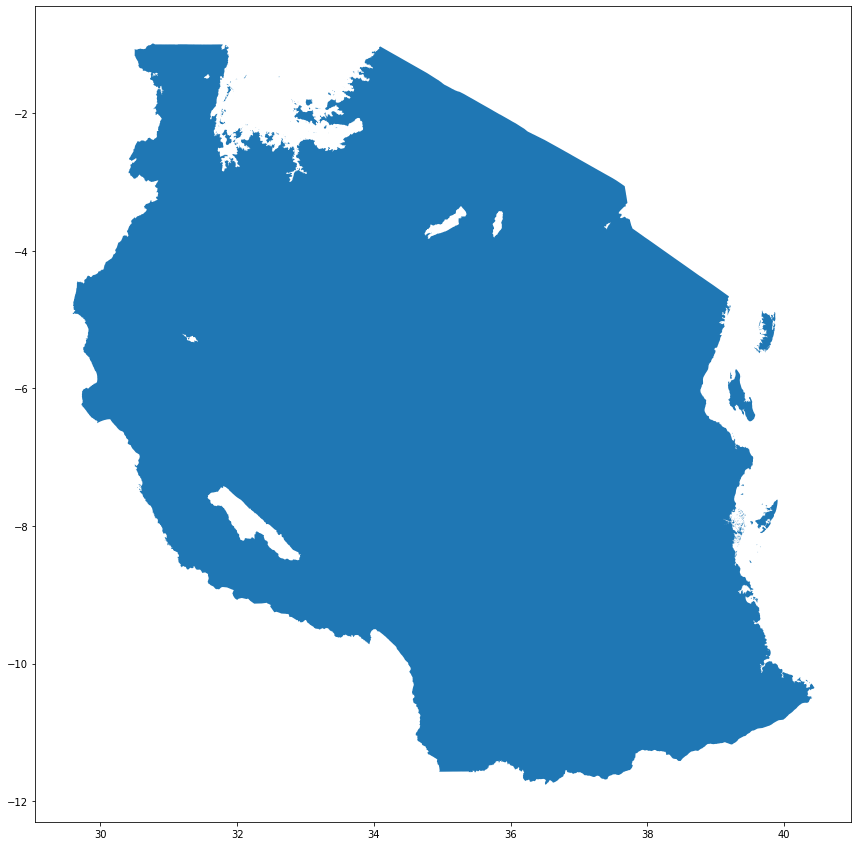

In [38]:
fig, ax = plt.subplots(figsize = (15,15))
tanz_map.plot(ax = ax)

In [39]:
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(df_train['longitude'], df_train['latitude'])]
geometry[:3]

In [40]:
geo_df = gpd.GeoDataFrame(df_train, crs = crs, geometry = geometry)

geo_df.head()

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,Unnamed: 0,amount_tsh,gps_height,longitude,latitude,basin,region,lga,population,public_meeting,...,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,waterpoint_type_group,status_group,geometry
0,0,6000.0,1390,34.938093,-9.856322,Lake Nyasa,Iringa,Ludewa,109,True,...,1999,gravity,user-group,annually,good,enough,spring,communal standpipe,3,POINT (34.93809 -9.85632)
2,2,25.0,686,37.460664,-3.821329,Pangani,Manyara,Simanjiro,250,True,...,2009,gravity,user-group,per bucket,good,enough,dam,communal standpipe,3,POINT (37.46066 -3.82133)
3,3,0.0,263,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,Nanyumbu,58,True,...,1986,submersible,user-group,never pay,good,dry,borehole,communal standpipe,1,POINT (38.48616 -11.15530)
5,5,20.0,0,39.172796,-4.765587,Pangani,Tanga,Mkinga,1,True,...,2009,submersible,user-group,per bucket,salty,enough,other,communal standpipe,3,POINT (39.17280 -4.76559)
6,6,0.0,0,33.362410,-3.766365,Internal,Shinyanga,Shinyanga Rural,0,True,...,0,handpump,user-group,never pay,good,enough,borehole,hand pump,1,POINT (33.36241 -3.76636)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd9f191ecf8>]],
      dtype=object)

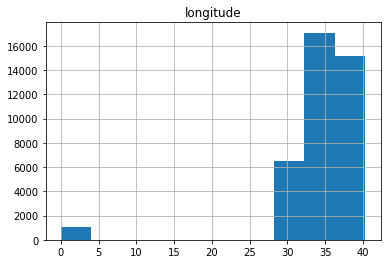

In [41]:
# Isolate outliers in longitude
geo_df.hist(column = 'longitude')

In [42]:
def remove_long_outliers(row):
    if row['longitude'] < 5:
        geo_df.drop(index = row.name, inplace = True)

geo_df.apply(lambda row: remove_long_outliers(row), axis = 1)

0        None
2        None
3        None
5        None
6        None
         ... 
47514    None
47516    None
47517    None
47518    None
47519    None
Length: 39875, dtype: object

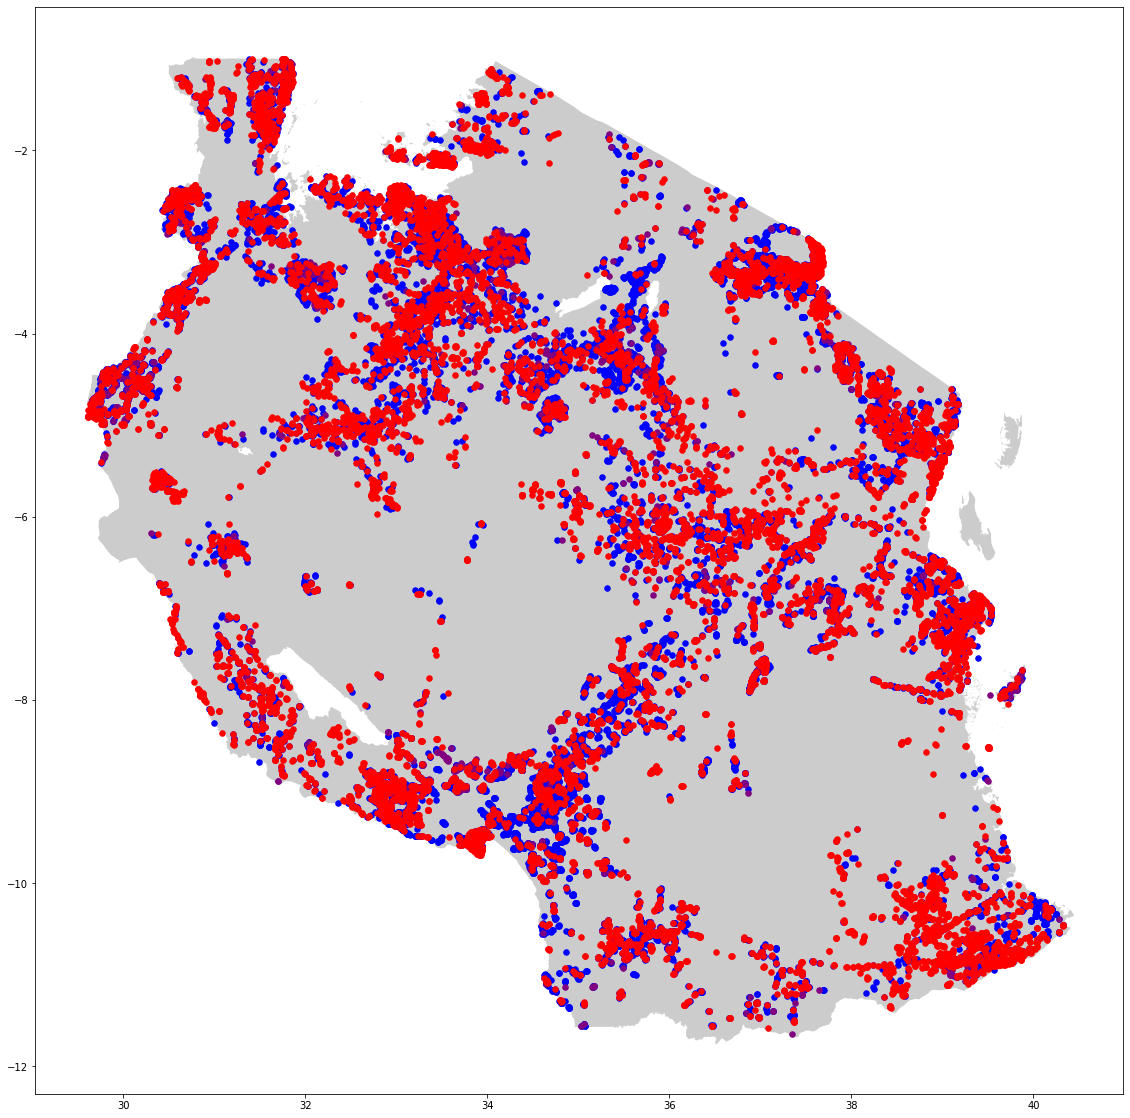

In [43]:
fig, ax = plt.subplots(figsize = (20,20))
tanz_map.plot(ax = ax, alpha = .4, color = "grey")

geo_df[geo_df['status_group'] == 3].plot(ax = ax, markersize = 30, color = 'blue', marker = 'o', label = 'Functional')
geo_df[geo_df['status_group'] == 2].plot(ax = ax, markersize = 30, color = 'purple', marker = 'o', label = 'In need of repair')
geo_df[geo_df['status_group'] == 1].plot(ax = ax, markersize = 30, color = 'red', marker = 'o', label = 'Non functional')



geo_df = geo_df.head(50)

groups = geo_df.groupby('status_group')

fig, ax = plt.subplots(figsize = (20,20))
tanz_map.plot(ax = ax, alpha = .4, color = "grey")

for name, group in groups:   
    for x in group.values:
        #if x[4] == 'Lake Nyasa':
            #geo_df[geo_df['status_group'] == 3].plot(ax = ax, markersize = 30, color = 'blue', marker = 'o', label = 'Functional')
            #geo_df[geo_df['status_group'] == 2].plot(ax = ax, markersize = 30, color = 'purple', marker = 'o', label = 'In need of repair')
            #geo_df[geo_df['status_group'] == 1].plot(ax = ax, markersize = 30, color = 'red', marker = 'o', label = 'Non functional')
        if x[4] == 'Pangani':
            geo_df[geo_df['status_group'] == 3].plot(ax = ax, markersize = 30, color = 'blue', marker = 'x', label = 'Functional')
            geo_df[geo_df['status_group'] == 2].plot(ax = ax, markersize = 30, color = 'purple', marker = 'x', label = 'In need of repair')
            geo_df[geo_df['status_group'] == 1].plot(ax = ax, markersize = 30, color = 'red', marker = 'x', label = 'Non functional')
        #if np.isnan(x[4]):
       #     ax.plot(x[1], x[2], marker='x', linestyle='', ms=12)
       # else:
       #     ax.plot(x[1], x[2], marker='o', linestyle='', ms=12)                       

#ax.legend()
plt.show()

In [44]:
geo_df['basin'].unique()

array(['Lake Nyasa', 'Pangani', 'Ruvuma / Southern Coast', 'Internal',
       'Lake Tanganyika', 'Wami / Ruvu', 'Rufiji', 'Lake Rukwa',
       'Lake Victoria'], dtype=object)

In [45]:
geo_df.head(20)

,Unnamed: 0,amount_tsh,gps_height,longitude,latitude,basin,region,lga,population,public_meeting,...,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,waterpoint_type_group,status_group,geometry
0,0,6000.0,1390,34.938093,-9.856322,Lake Nyasa,Iringa,Ludewa,109,True,...,1999,gravity,user-group,annually,good,enough,spring,communal standpipe,3,POINT (34.93809 -9.85632)
2,2,25.0,686,37.460664,-3.821329,Pangani,Manyara,Simanjiro,250,True,...,2009,gravity,user-group,per bucket,good,enough,dam,communal standpipe,3,POINT (37.46066 -3.82133)
3,3,0.0,263,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,Nanyumbu,58,True,...,1986,submersible,user-group,never pay,good,dry,borehole,communal standpipe,1,POINT (38.48616 -11.15530)
5,5,20.0,0,39.172796,-4.765587,Pangani,Tanga,Mkinga,1,True,...,2009,submersible,user-group,per bucket,salty,enough,other,communal standpipe,3,POINT (39.17280 -4.76559)
6,6,0.0,0,33.362410,-3.766365,Internal,Shinyanga,Shinyanga Rural,0,True,...,0,handpump,user-group,never pay,good,enough,borehole,hand pump,1,POINT (33.36241 -3.76636)
8,8,0.0,0,32.711100,-5.146712,Lake Tanganyika,Tabora,Tabora Urban,0,True,...,0,handpump,user-group,never pay,salty,seasonal,borehole,hand pump,1,POINT (32.71110 -5.14671)
10,10,0.0,62,39.209518,-7.034139,Wami / Ruvu,Pwani,Mkuranga,345,True,...,2011,submersible,commercial,never pay,salty,enough,borehole,other,3,POINT (39.20952 -7.03414)
11,11,200.0,1062,35.770258,-10.574175,Lake Nyasa,Ruvuma,Namtumbo,250,True,...,1987,handpump,user-group,on failure,good,insufficient,shallow well,hand pump,3,POINT (35.77026 -10.57417)
12,12,0.0,0,33.798106,-3.290194,Internal,Shinyanga,Maswa,0,True,...,0,handpump,user-group,other,good,enough,shallow well,hand pump,3,POINT (33.79811 -3.29019)
13,13,0.0,1368,37.092574,-3.181783,Pangani,Kilimanjaro,Siha,1,True,...,2009,gravity,user-group,monthly,good,enough,spring,communal standpipe,3,POINT (37.09257 -3.18178)


In [9]:
df_train.drop(columns = 'latitude', inplace = True)
df_train.drop(columns = 'longitude', inplace = True)

df_test.drop(columns = 'latitude', inplace = True)
df_test.drop(columns = 'longitude', inplace = True)

# Converting Categorical Binary Variables

### Public Meeting

In [12]:
#Encode public meeting from True/False to 1/0
df_train["public_meeting"] = df_train["public_meeting"].astype(int)
df_test["public_meeting"] = df_test["public_meeting"].astype(int)

### Permit

In [13]:
#Encode permit from True/False to 1/0
df_train["permit"] = df_train["permit"].astype(int)
df_test["permit"] = df_test["permit"].astype(int)

# Converting Categorical Variables Using Label Encoding (for Random Forest Model)

Features: 
* extraction_type_class
* waterpoint_type_group
* payment_type
* quality_group
* quantity
* source_type
* management_group
* scheme_management
* construction_year (by decade)
* region
* basin

In [85]:
df_train_tree = df_train.copy()
df_test_tree = df_train.copy()

In [86]:
def labelEncode(feature):
    df_train_tree[feature] = df_train_tree[feature].astype('category')
    df_train_tree[feature] = df_train_tree[feature].cat.codes

    df_test_tree[feature] = df_test_tree[feature].astype('category')
    df_test_tree[feature] = df_test_tree[feature].cat.codes
    

In [60]:
def construction_buckets(row):
    if (row['construction_year'] > 1959) and (row['construction_year'] < 1970):
        return '1960s'
    elif (row['construction_year'] > 1969) and (row['construction_year'] < 1980):
        return '1970s'
    elif (row['construction_year'] > 1979) and (row['construction_year'] < 1990):
        return '1980s'
    elif (row['construction_year'] > 1989) and (row['construction_year'] < 1990):
        return '1990s'
    elif (row['construction_year'] > 1999) and (row['construction_year'] < 2010):
        return '2000s'
    elif (row['construction_year'] > 2009) and (row['construction_year'] < 2020):
        return '2010s'
    else:
        return 'Unknown'
    
df_train_tree['construction_year'] = df_train_tree.apply(lambda row: construction_buckets(row), axis=1)
df_test_tree['construction_year'] = df_test_tree.apply(lambda row: construction_buckets(row), axis=1)

In [87]:
toEncode = ['extraction_type_class', 'waterpoint_type_group', 'payment_type', 'quality_group', 
            'quantity', 'source_type', 'management_group', 'scheme_management', 'region', 'basin', 
            'construction_year']

for feature in toEncode:
    labelEncode(feature)

In [88]:
df_train_tree.head()

,Unnamed: 0,amount_tsh,gps_height,longitude,latitude,basin,region,lga,population,public_meeting,...,permit,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,waterpoint_type_group,status_group
0,0,6000.0,1390,34.938093,-9.856322,1,3,Ludewa,109,1,...,0,5,0,4,0,2,1,6,1,3
2,2,25.0,686,37.460664,-3.821329,5,8,Simanjiro,250,1,...,1,3,0,4,5,2,1,1,1,3
3,3,0.0,263,38.486161,-11.155298,7,12,Nanyumbu,58,1,...,1,2,5,4,2,2,0,0,1,1
5,5,20.0,0,39.172796,-4.765587,5,20,Mkinga,1,1,...,1,3,5,4,5,4,1,2,1,3
6,6,0.0,0,33.362410,-3.766365,0,17,Shinyanga Rural,0,1,...,1,5,1,4,2,2,1,0,3,1


In [90]:
df_train_tree.drop(columns = 'Unnamed: 0', inplace = True)
df_train_tree.drop(columns = 'lga', inplace = True)

df_test_tree.drop(columns = 'Unnamed: 0', inplace = True)
df_test_tree.drop(columns = 'lga', inplace = True)

In [91]:
df_train_tree.columns

Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'basin', 'region',
       'population', 'public_meeting', 'scheme_management', 'permit',
       'construction_year', 'extraction_type_class', 'management_group',
       'payment_type', 'quality_group', 'quantity', 'source_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [92]:
df_train_tree.head()

,amount_tsh,gps_height,longitude,latitude,basin,region,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,waterpoint_type_group,status_group
0,6000.0,1390,34.938093,-9.856322,1,3,109,1,7,0,5,0,4,0,2,1,6,1,3
2,25.0,686,37.460664,-3.821329,5,8,250,1,7,1,3,0,4,5,2,1,1,1,3
3,0.0,263,38.486161,-11.155298,7,12,58,1,7,1,2,5,4,2,2,0,0,1,1
5,20.0,0,39.172796,-4.765587,5,20,1,1,7,1,3,5,4,5,4,1,2,1,3
6,0.0,0,33.362410,-3.766365,0,17,0,1,7,1,5,1,4,2,2,1,0,3,1


In [93]:
df_train_tree.to_csv('pre_processed_train_tree.csv')
df_test_tree.to_csv('pre_processed_test_tree.csv')

# Converting Categorical Variables Using One-Hot Encoding

In [11]:
from sklearn.preprocessing import OneHotEncoder

### Extraction Type Class

In [50]:
unique_df = df_train['extraction_type_class'].value_counts()
print(unique_df)

print('Null values: ', df_train['extraction_type_class'].isnull().sum())

print('Number of variables: ', len(df_train['extraction_type_class'].unique()))

gravity         19186
handpump        10551
submersible      4125
other            3638
motorpump        2124
rope pump         173
wind-powered       78
Name: extraction_type_class, dtype: int64
Null values:  0
Number of variables:  7


In [51]:
dummies_train = pd.get_dummies(df_train['extraction_type_class'], drop_first = 'True')
for column in dummies_train.columns:
    dummies_train.rename(columns={column: 'extraction_type_class_' + column}, inplace = True)
df_train = pd.concat([df_train, dummies_train], axis=1)

dummies_test = pd.get_dummies(df_test['extraction_type_class'], drop_first = 'True')
for column in dummies_test.columns:
    dummies_test.rename(columns={column: 'extraction_type_class_' + column}, inplace = True)
df_test = pd.concat([df_test, dummies_test], axis=1)

df_train.head()

,Unnamed: 0,amount_tsh,gps_height,basin,region,lga,population,public_meeting,scheme_management,permit,...,source_type,waterpoint_type_group,status_group,geometry,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered
0,0,6000.0,1390,Lake Nyasa,Iringa,Ludewa,109,1,VWC,0,...,spring,communal standpipe,3,POINT (34.93809 -9.85632),0,0,0,0,0,0
2,2,25.0,686,Pangani,Manyara,Simanjiro,250,1,VWC,1,...,dam,communal standpipe,3,POINT (37.46066 -3.82133),0,0,0,0,0,0
3,3,0.0,263,Ruvuma / Southern Coast,Mtwara,Nanyumbu,58,1,VWC,1,...,borehole,communal standpipe,1,POINT (38.48616 -11.15530),0,0,0,0,1,0
5,5,20.0,0,Pangani,Tanga,Mkinga,1,1,VWC,1,...,other,communal standpipe,3,POINT (39.17280 -4.76559),0,0,0,0,1,0
6,6,0.0,0,Internal,Shinyanga,Shinyanga Rural,0,1,VWC,1,...,borehole,hand pump,1,POINT (33.36241 -3.76636),1,0,0,0,0,0


In [52]:
df_train.drop(columns = 'extraction_type_class', inplace = True)
df_test.drop(columns = 'extraction_type_class', inplace = True)

df_train.drop(columns = 'Unnamed: 0', inplace = True)
df_test.drop(columns = 'Unnamed: 0', inplace = True)

### Waterpoint Type Group

In [53]:
unique_df = df_train['waterpoint_type_group'].value_counts()
print(unique_df)

print('Null values: ', df_train['waterpoint_type_group'].isnull().sum())

print('Number of variables: ', len(df_train['waterpoint_type_group'].unique()))

communal standpipe    24422
hand pump             11100
other                  3725
improved spring         555
cattle trough            68
dam                       5
Name: waterpoint_type_group, dtype: int64
Null values:  0
Number of variables:  6


In [54]:
dummies_train = pd.get_dummies(df_train['waterpoint_type_group'], drop_first = 'True')
for column in dummies_train.columns:
    dummies_train.rename(columns={column: 'waterpoint_type_group_' + column}, inplace = True)
df_train = pd.concat([df_train, dummies_train], axis=1)

dummies_test = pd.get_dummies(df_test['waterpoint_type_group'], drop_first = 'True')
for column in dummies_test.columns:
    dummies_test.rename(columns={column: 'waterpoint_type_group_' + column}, inplace = True)
df_test = pd.concat([df_test, dummies_test], axis=1)

df_train.head()

,amount_tsh,gps_height,basin,region,lga,population,public_meeting,scheme_management,permit,construction_year,...,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,6000.0,1390,Lake Nyasa,Iringa,Ludewa,109,1,VWC,0,1999,...,0,0,0,0,0,1,0,0,0,0
2,25.0,686,Pangani,Manyara,Simanjiro,250,1,VWC,1,2009,...,0,0,0,0,0,1,0,0,0,0
3,0.0,263,Ruvuma / Southern Coast,Mtwara,Nanyumbu,58,1,VWC,1,1986,...,0,0,0,1,0,1,0,0,0,0
5,20.0,0,Pangani,Tanga,Mkinga,1,1,VWC,1,2009,...,0,0,0,1,0,1,0,0,0,0
6,0.0,0,Internal,Shinyanga,Shinyanga Rural,0,1,VWC,1,0,...,0,0,0,0,0,0,0,1,0,0


In [55]:
df_train.drop(columns = 'waterpoint_type_group', inplace = True)
df_test.drop(columns = 'waterpoint_type_group', inplace = True)

### Payment Type

In [56]:
unique_df = df_train['payment_type'].value_counts()
print(unique_df)

print('Null values: ', df_train['payment_type'].isnull().sum())

print('Number of variables: ', len(df_train['payment_type'].unique()))

never pay     17125
per bucket     6537
monthly        6189
unknown        3513
on failure     2946
annually       2831
other           734
Name: payment_type, dtype: int64
Null values:  0
Number of variables:  7


In [57]:
dummies_train = pd.get_dummies(df_train['payment_type'], drop_first = 'True')
for column in dummies_train.columns:
    dummies_train.rename(columns={column: 'payment_type_' + column}, inplace = True)
df_train = pd.concat([df_train, dummies_train], axis=1)

dummies_test = pd.get_dummies(df_test['payment_type'], drop_first = 'True')
for column in dummies_test.columns:
    dummies_test.rename(columns={column: 'payment_type_' + column}, inplace = True)
df_test = pd.concat([df_test, dummies_test], axis=1)

df_train.head()

,amount_tsh,gps_height,basin,region,lga,population,public_meeting,scheme_management,permit,construction_year,...,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other,payment_type_monthly,payment_type_never pay,payment_type_on failure,payment_type_other,payment_type_per bucket,payment_type_unknown
0,6000.0,1390,Lake Nyasa,Iringa,Ludewa,109,1,VWC,0,1999,...,0,0,0,0,0,0,0,0,0,0
2,25.0,686,Pangani,Manyara,Simanjiro,250,1,VWC,1,2009,...,0,0,0,0,0,0,0,0,1,0
3,0.0,263,Ruvuma / Southern Coast,Mtwara,Nanyumbu,58,1,VWC,1,1986,...,0,0,0,0,0,1,0,0,0,0
5,20.0,0,Pangani,Tanga,Mkinga,1,1,VWC,1,2009,...,0,0,0,0,0,0,0,0,1,0
6,0.0,0,Internal,Shinyanga,Shinyanga Rural,0,1,VWC,1,0,...,0,1,0,0,0,1,0,0,0,0


In [58]:
df_train.drop(columns = 'payment_type', inplace = True)
df_test.drop(columns = 'payment_type', inplace = True)

### Quality Group

In [59]:
unique_df = df_train['quality_group'].value_counts()
print(unique_df)

print('Null values: ', df_train['quality_group'].isnull().sum())

print('Number of variables: ', len(df_train['quality_group'].unique()))

good        35014
salty        3370
unknown       759
colored       330
milky         250
fluoride      152
Name: quality_group, dtype: int64
Null values:  0
Number of variables:  6


In [60]:
dummies_train = pd.get_dummies(df_train['quality_group'], drop_first = 'True')
for column in dummies_train.columns:
    dummies_train.rename(columns={column: 'quality_group_' + column}, inplace = True)
df_train = pd.concat([df_train, dummies_train], axis=1)

dummies_test = pd.get_dummies(df_test['quality_group'], drop_first = 'True')
for column in dummies_test.columns:
    dummies_test.rename(columns={column: 'quality_group_' + column}, inplace = True)
df_test = pd.concat([df_test, dummies_test], axis=1)

df_train.head()

,amount_tsh,gps_height,basin,region,lga,population,public_meeting,scheme_management,permit,construction_year,...,payment_type_never pay,payment_type_on failure,payment_type_other,payment_type_per bucket,payment_type_unknown,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown
0,6000.0,1390,Lake Nyasa,Iringa,Ludewa,109,1,VWC,0,1999,...,0,0,0,0,0,0,1,0,0,0
2,25.0,686,Pangani,Manyara,Simanjiro,250,1,VWC,1,2009,...,0,0,0,1,0,0,1,0,0,0
3,0.0,263,Ruvuma / Southern Coast,Mtwara,Nanyumbu,58,1,VWC,1,1986,...,1,0,0,0,0,0,1,0,0,0
5,20.0,0,Pangani,Tanga,Mkinga,1,1,VWC,1,2009,...,0,0,0,1,0,0,0,0,1,0
6,0.0,0,Internal,Shinyanga,Shinyanga Rural,0,1,VWC,1,0,...,1,0,0,0,0,0,1,0,0,0


In [61]:
df_train.drop(columns = 'quality_group', inplace = True)
df_test.drop(columns = 'quality_group', inplace = True)

### Quantity of Water

In [62]:
unique_df = df_train['quantity'].value_counts()
print(unique_df)

print('Null values: ', df_train['quantity'].isnull().sum())

print('Number of variables: ', len(df_train['quantity'].unique()))

enough          22984
insufficient     9758
dry              4120
seasonal         2769
unknown           244
Name: quantity, dtype: int64
Null values:  0
Number of variables:  5


In [63]:
dummies_train = pd.get_dummies(df_train['quantity'], drop_first = 'True')
for column in dummies_train.columns:
    dummies_train.rename(columns={column: 'quantity_' + column}, inplace = True)
df_train = pd.concat([df_train, dummies_train], axis=1)

dummies_test = pd.get_dummies(df_test['quantity'], drop_first = 'True')
for column in dummies_test.columns:
    dummies_test.rename(columns={column: 'quantity_' + column}, inplace = True)
df_test = pd.concat([df_test, dummies_test], axis=1)

df_train.head()

,amount_tsh,gps_height,basin,region,lga,population,public_meeting,scheme_management,permit,construction_year,...,payment_type_unknown,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown
0,6000.0,1390,Lake Nyasa,Iringa,Ludewa,109,1,VWC,0,1999,...,0,0,1,0,0,0,1,0,0,0
2,25.0,686,Pangani,Manyara,Simanjiro,250,1,VWC,1,2009,...,0,0,1,0,0,0,1,0,0,0
3,0.0,263,Ruvuma / Southern Coast,Mtwara,Nanyumbu,58,1,VWC,1,1986,...,0,0,1,0,0,0,0,0,0,0
5,20.0,0,Pangani,Tanga,Mkinga,1,1,VWC,1,2009,...,0,0,0,0,1,0,1,0,0,0
6,0.0,0,Internal,Shinyanga,Shinyanga Rural,0,1,VWC,1,0,...,0,0,1,0,0,0,1,0,0,0


In [64]:
df_train.drop(columns = 'quantity', inplace = True)
df_test.drop(columns = 'quantity', inplace = True)

### Source Type

In [65]:
unique_df = df_train['source_type'].value_counts()
print(unique_df)

print('Null values: ', df_train['source_type'].isnull().sum())

print('Number of variables: ', len(df_train['source_type'].unique()))

spring                  12151
shallow well            10031
borehole                 7970
river/lake               7772
rainwater harvesting     1324
dam                       456
other                     171
Name: source_type, dtype: int64
Null values:  0
Number of variables:  7


In [66]:
dummies_train = pd.get_dummies(df_train['source_type'], drop_first = 'True')
for column in dummies_train.columns:
    dummies_train.rename(columns={column: 'source_type_' + column}, inplace = True)
df_train = pd.concat([df_train, dummies_train], axis=1)

dummies_test = pd.get_dummies(df_test['source_type'], drop_first = 'True')
for column in dummies_test.columns:
    dummies_test.rename(columns={column: 'source_type_' + column}, inplace = True)
df_test = pd.concat([df_test, dummies_test], axis=1)

df_train.head()

,amount_tsh,gps_height,basin,region,lga,population,public_meeting,scheme_management,permit,construction_year,...,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,source_type_dam,source_type_other,source_type_rainwater harvesting,source_type_river/lake,source_type_shallow well,source_type_spring
0,6000.0,1390,Lake Nyasa,Iringa,Ludewa,109,1,VWC,0,1999,...,1,0,0,0,0,0,0,0,0,1
2,25.0,686,Pangani,Manyara,Simanjiro,250,1,VWC,1,2009,...,1,0,0,0,1,0,0,0,0,0
3,0.0,263,Ruvuma / Southern Coast,Mtwara,Nanyumbu,58,1,VWC,1,1986,...,0,0,0,0,0,0,0,0,0,0
5,20.0,0,Pangani,Tanga,Mkinga,1,1,VWC,1,2009,...,1,0,0,0,0,1,0,0,0,0
6,0.0,0,Internal,Shinyanga,Shinyanga Rural,0,1,VWC,1,0,...,1,0,0,0,0,0,0,0,0,0


In [67]:
df_train.drop(columns = 'source_type', inplace = True)
df_test.drop(columns = 'source_type', inplace = True)

### Management Group

In [68]:
unique_df = df_train['management_group'].value_counts()
print(unique_df)

print('Null values: ', df_train['management_group'].isnull().sum())

print('Number of variables: ', len(df_train['management_group'].unique()))

user-group    35851
commercial     2466
parastatal     1065
other           435
unknown          58
Name: management_group, dtype: int64
Null values:  0
Number of variables:  5


In [69]:
dummies_train = pd.get_dummies(df_train['management_group'], drop_first = 'True')
for column in dummies_train.columns:
    dummies_train.rename(columns={column: 'management_group_' + column}, inplace = True)
df_train = pd.concat([df_train, dummies_train], axis=1)

dummies_test = pd.get_dummies(df_test['management_group'], drop_first = 'True')
for column in dummies_test.columns:
    dummies_test.rename(columns={column: 'management_group_' + column}, inplace = True)
df_test = pd.concat([df_test, dummies_test], axis=1)

df_train.head()

,amount_tsh,gps_height,basin,region,lga,population,public_meeting,scheme_management,permit,construction_year,...,source_type_dam,source_type_other,source_type_rainwater harvesting,source_type_river/lake,source_type_shallow well,source_type_spring,management_group_other,management_group_parastatal,management_group_unknown,management_group_user-group
0,6000.0,1390,Lake Nyasa,Iringa,Ludewa,109,1,VWC,0,1999,...,0,0,0,0,0,1,0,0,0,1
2,25.0,686,Pangani,Manyara,Simanjiro,250,1,VWC,1,2009,...,1,0,0,0,0,0,0,0,0,1
3,0.0,263,Ruvuma / Southern Coast,Mtwara,Nanyumbu,58,1,VWC,1,1986,...,0,0,0,0,0,0,0,0,0,1
5,20.0,0,Pangani,Tanga,Mkinga,1,1,VWC,1,2009,...,0,1,0,0,0,0,0,0,0,1
6,0.0,0,Internal,Shinyanga,Shinyanga Rural,0,1,VWC,1,0,...,0,0,0,0,0,0,0,0,0,1


In [70]:
df_train.drop(columns = 'management_group', inplace = True)
df_test.drop(columns = 'management_group', inplace = True)

### Scheme Management

In [71]:
unique_df = df_train['scheme_management'].value_counts()
print(unique_df)

print('Null values: ', df_train['scheme_management'].isnull().sum())

print('Number of variables: ', len(df_train['scheme_management'].unique()))

VWC                 26875
WUG                  3396
Water authority      2350
WUA                  2219
Water Board          2096
Parastatal           1027
Company               839
Private operator      634
Other                 307
SWC                    73
Trust                  58
None                    1
Name: scheme_management, dtype: int64
Null values:  0
Number of variables:  12


In [72]:
def scheme_buckets(row):
    if row['scheme_management'] == 'VWC':
        return 'VWS'
    elif row['scheme_management'] == 'WUG':
        return 'WUG'
    elif row['scheme_management'] == 'Water authority':
        return 'Water authority'
    elif row['scheme_management'] == 'Water Board':
        return 'Water Board'
    elif row['scheme_management'] == 'Parastatal':
        return 'Parastatal'
    elif row['scheme_management'] == 'Company':
        return 'Company'
    elif row['scheme_management'] == 'Private operator':
        return 'Private operator'
    else:
        return 'Other'
    
df_train['scheme_management'] = df_train.apply(lambda row: scheme_buckets(row), axis=1)
df_test['scheme_management'] = df_test.apply(lambda row: scheme_buckets(row), axis=1)

In [73]:
dummies_train = pd.get_dummies(df_train['scheme_management'], drop_first = 'True')
for column in dummies_train.columns:
    dummies_train.rename(columns={column: 'scheme_management_' + column}, inplace = True)
df_train = pd.concat([df_train, dummies_train], axis=1)

dummies_test = pd.get_dummies(df_test['scheme_management'], drop_first = 'True')
for column in dummies_test.columns:
    dummies_test.rename(columns={column: 'scheme_management_' + column}, inplace = True)
df_test = pd.concat([df_test, dummies_test], axis=1)

df_train.head()

,amount_tsh,gps_height,basin,region,lga,population,public_meeting,scheme_management,permit,construction_year,...,management_group_parastatal,management_group_unknown,management_group_user-group,scheme_management_Other,scheme_management_Parastatal,scheme_management_Private operator,scheme_management_VWS,scheme_management_WUG,scheme_management_Water Board,scheme_management_Water authority
0,6000.0,1390,Lake Nyasa,Iringa,Ludewa,109,1,VWS,0,1999,...,0,0,1,0,0,0,1,0,0,0
2,25.0,686,Pangani,Manyara,Simanjiro,250,1,VWS,1,2009,...,0,0,1,0,0,0,1,0,0,0
3,0.0,263,Ruvuma / Southern Coast,Mtwara,Nanyumbu,58,1,VWS,1,1986,...,0,0,1,0,0,0,1,0,0,0
5,20.0,0,Pangani,Tanga,Mkinga,1,1,VWS,1,2009,...,0,0,1,0,0,0,1,0,0,0
6,0.0,0,Internal,Shinyanga,Shinyanga Rural,0,1,VWS,1,0,...,0,0,1,0,0,0,1,0,0,0


In [74]:
df_train.drop(columns = 'scheme_management', inplace = True)
df_test.drop(columns = 'scheme_management', inplace = True)

## Construction Year

In [75]:
def construction_buckets(row):
    if (row['construction_year'] > 1959) and (row['construction_year'] < 1970):
        return '1960s'
    elif (row['construction_year'] > 1969) and (row['construction_year'] < 1980):
        return '1970s'
    elif (row['construction_year'] > 1979) and (row['construction_year'] < 1990):
        return '1980s'
    elif (row['construction_year'] > 1989) and (row['construction_year'] < 1990):
        return '1990s'
    elif (row['construction_year'] > 1999) and (row['construction_year'] < 2010):
        return '2000s'
    elif (row['construction_year'] > 2009) and (row['construction_year'] < 2020):
        return '2010s'
    else:
        return 'Unknown'
    
df_train['construction_year'] = df_train.apply(lambda row: construction_buckets(row), axis=1)
df_test['construction_year'] = df_test.apply(lambda row: construction_buckets(row), axis=1)

In [76]:
dummies_train = pd.get_dummies(df_train['construction_year'], drop_first = 'True')
for column in dummies_train.columns:
    dummies_train.rename(columns={column: 'construction_year_' + column}, inplace = True)
df_train = pd.concat([df_train, dummies_train], axis=1)

dummies_test = pd.get_dummies(df_test['construction_year'], drop_first = 'True')
for column in dummies_test.columns:
    dummies_test.rename(columns={column: 'construction_year_' + column}, inplace = True)
df_test = pd.concat([df_test, dummies_test], axis=1)

df_train.head()

,amount_tsh,gps_height,basin,region,lga,population,public_meeting,permit,construction_year,status_group,...,scheme_management_Private operator,scheme_management_VWS,scheme_management_WUG,scheme_management_Water Board,scheme_management_Water authority,construction_year_1970s,construction_year_1980s,construction_year_2000s,construction_year_2010s,construction_year_Unknown
0,6000.0,1390,Lake Nyasa,Iringa,Ludewa,109,1,0,Unknown,3,...,0,1,0,0,0,0,0,0,0,1
2,25.0,686,Pangani,Manyara,Simanjiro,250,1,1,2000s,3,...,0,1,0,0,0,0,0,1,0,0
3,0.0,263,Ruvuma / Southern Coast,Mtwara,Nanyumbu,58,1,1,1980s,1,...,0,1,0,0,0,0,1,0,0,0
5,20.0,0,Pangani,Tanga,Mkinga,1,1,1,2000s,3,...,0,1,0,0,0,0,0,1,0,0
6,0.0,0,Internal,Shinyanga,Shinyanga Rural,0,1,1,Unknown,1,...,0,1,0,0,0,0,0,0,0,1


In [77]:
df_train.drop(columns = 'construction_year', inplace = True)
df_test.drop(columns = 'construction_year', inplace = True)

## Remove Geographical Data

In [78]:
df_train.drop(columns = 'basin', inplace = True)
df_train.drop(columns = 'region', inplace = True)
df_train.drop(columns = 'lga', inplace = True)
df_train.drop(columns = 'geometry', inplace = True)

df_test.drop(columns = 'basin', inplace = True)
df_test.drop(columns = 'region', inplace = True)
df_test.drop(columns = 'lga', inplace = True)

In [86]:
df_train.to_csv('pre_processed_train.csv')
df_test.to_csv('pre_processed_test.csv')